In [1]:

import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler  
from sklearn.metrics import roc_curve
from sklearn.preprocessing import LabelEncoder
!pip install imbalanced_learn
!pip install xgboost
from sklearn.linear_model import LogisticRegression 
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score,confusion_matrix

from imblearn.combine import SMOTETomek

import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [2]:
df = pd.read_csv('train.csv')
print(df.shape)
df.head()

(45211, 11)


,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome,y
0,58,management,married,tertiary,unknown,5,may,261,1,unknown,no
1,44,technician,single,secondary,unknown,5,may,151,1,unknown,no
2,33,entrepreneur,married,secondary,unknown,5,may,76,1,unknown,no
3,47,blue-collar,married,unknown,unknown,5,may,92,1,unknown,no
4,33,unknown,single,unknown,unknown,5,may,198,1,unknown,no


In [3]:
df.dtypes

age                int64
job               object
marital           object
education_qual    object
call_type         object
day                int64
mon               object
dur                int64
num_calls          int64
prev_outcome      object
y                 object
dtype: object

In [4]:
df.drop_duplicates(inplace=True)
df.dropna(inplace=True)
df.reset_index(drop=True, inplace=True)
df

,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome,y
0,58,management,married,tertiary,unknown,5,may,261,1,unknown,no
1,44,technician,single,secondary,unknown,5,may,151,1,unknown,no
2,33,entrepreneur,married,secondary,unknown,5,may,76,1,unknown,no
3,47,blue-collar,married,unknown,unknown,5,may,92,1,unknown,no
4,33,unknown,single,unknown,unknown,5,may,198,1,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...
45200,51,technician,married,tertiary,cellular,17,nov,977,3,unknown,yes
45201,71,retired,divorced,primary,cellular,17,nov,456,2,unknown,yes
45202,72,retired,married,secondary,cellular,17,nov,1127,5,success,yes
45203,57,blue-collar,married,secondary,telephone,17,nov,508,4,unknown,no


In [5]:
df.isnull().sum()

age               0
job               0
marital           0
education_qual    0
call_type         0
day               0
mon               0
dur               0
num_calls         0
prev_outcome      0
y                 0
dtype: int64

In [6]:
df.describe()

,age,day,dur,num_calls
count,45205.000000,45205.00000,45205.000000,45205.000000
mean,40.937087,15.80688,258.183055,2.763898
std,10.619130,8.32234,257.538504,3.098189
min,18.000000,1.00000,0.000000,1.000000
25%,33.000000,8.00000,103.000000,1.000000
50%,39.000000,16.00000,180.000000,2.000000
75%,48.000000,21.00000,319.000000,3.000000
max,95.000000,31.00000,4918.000000,63.000000


In [7]:
df["y"].value_counts()

no     39916
yes     5289
Name: y, dtype: int64

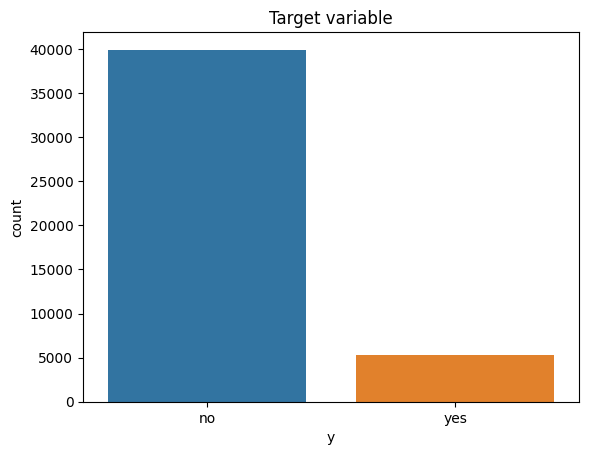

In [8]:
sns.countplot(x='y', data=df)
plt.title("Target variable")
plt.show()

In [9]:
print("Percentage of NO and YES\n", df['y'].value_counts()/len(df)*100)

Percentage of NO and YES
 no     88.299967
yes    11.700033
Name: y, dtype: float64


In [10]:
cat_var= df.select_dtypes(include=['object']).columns
print(cat_var)

Index(['job', 'marital', 'education_qual', 'call_type', 'mon', 'prev_outcome',
       'y'],
      dtype='object')


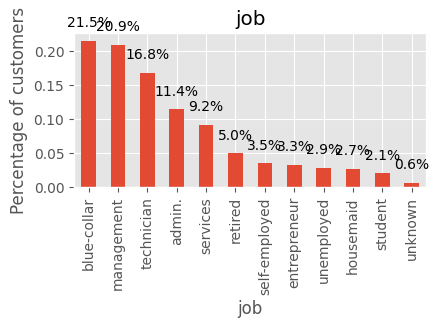

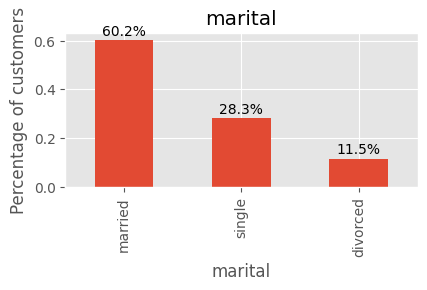

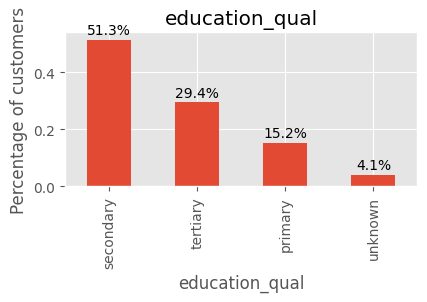

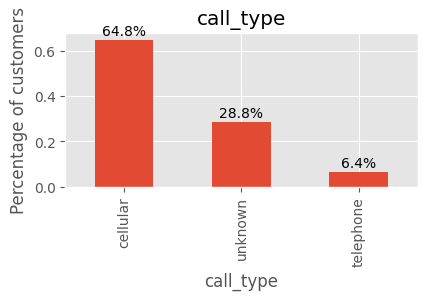

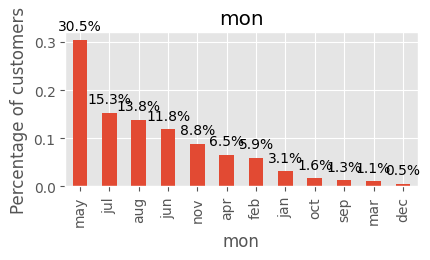

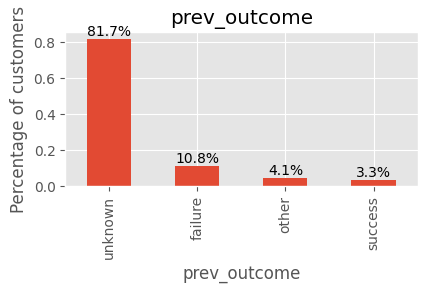

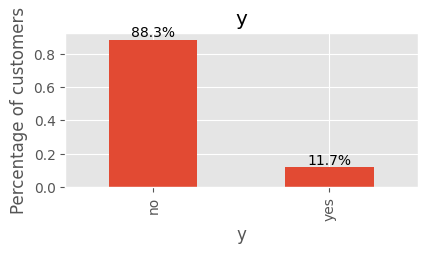

In [11]:
plt.style.use("ggplot")

for column in cat_var:
    plt.figure(figsize=(10,2))
    ax= plt.subplot(121)
    df[column].value_counts(normalize=True).plot(kind="bar")
    plt.xlabel(column)
    plt.ylabel("Percentage of customers")
    plt.title(column)
    
    for p in ax.patches:
        ax.text(p.get_x() + p.get_width()/2., p.get_height()+0.02, f"{p.get_height()*100:.1f}%", ha="center")

In [12]:
#cate_var= ['job','education_qual']
#for column in cate_var:
 #   mode=df[column].mode(0)
  #  df[column].fillna(mode, inplace=True)
    

In [13]:
num_var = df.select_dtypes(include= np.number)
num_var

,age,day,dur,num_calls
0,58,5,261,1
1,44,5,151,1
2,33,5,76,1
3,47,5,92,1
4,33,5,198,1
...,...,...,...,...
45200,51,17,977,3
45201,71,17,456,2
45202,72,17,1127,5
45203,57,17,508,4


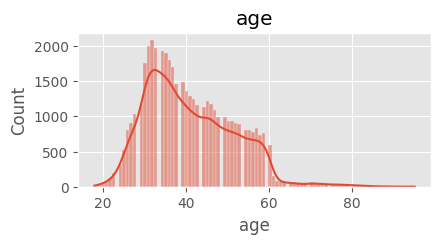

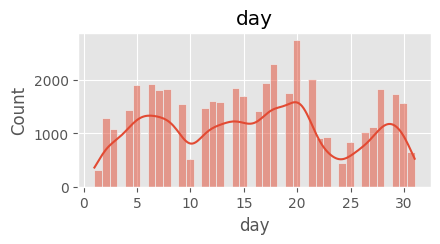

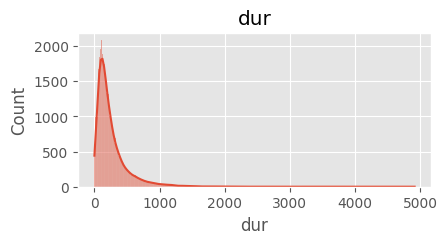

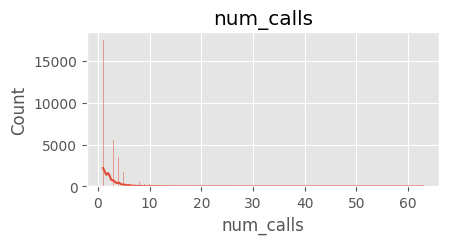

In [14]:
plt.style.use("ggplot")
for column in ['age','day','dur','num_calls']:
    plt.figure(figsize=(10,2))
    plt.subplot(121)
    sns.histplot(df[column],kde=True)
    plt.title(column)

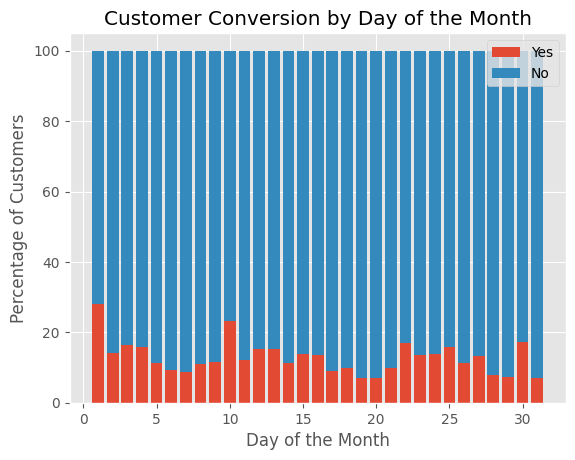

In [15]:
day_counts = df.groupby('day')['y'].value_counts(normalize=True) * 100
yes_counts = day_counts[:, 'yes']
no_counts = day_counts[:, 'no']

plt.bar(day_counts.index.levels[0], yes_counts, label='Yes')
plt.bar(day_counts.index.levels[0], no_counts, bottom=yes_counts, label='No')
plt.xlabel('Day of the Month')
plt.ylabel('Percentage of Customers')
plt.title('Customer Conversion by Day of the Month')
plt.legend()
plt.show()

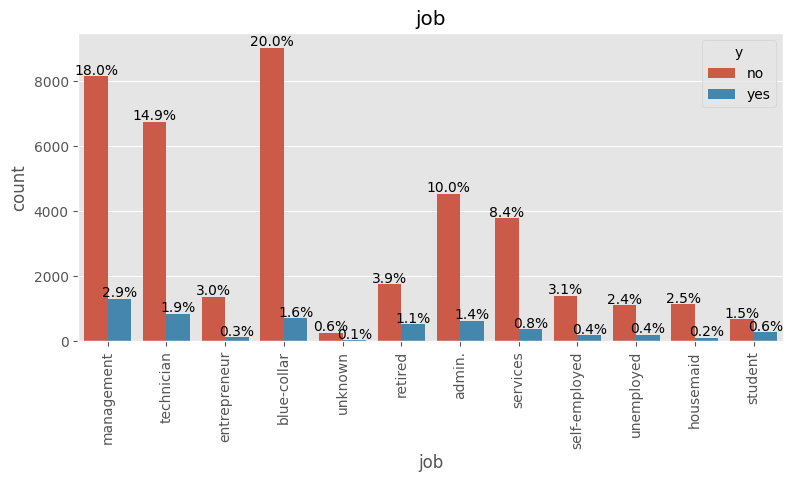

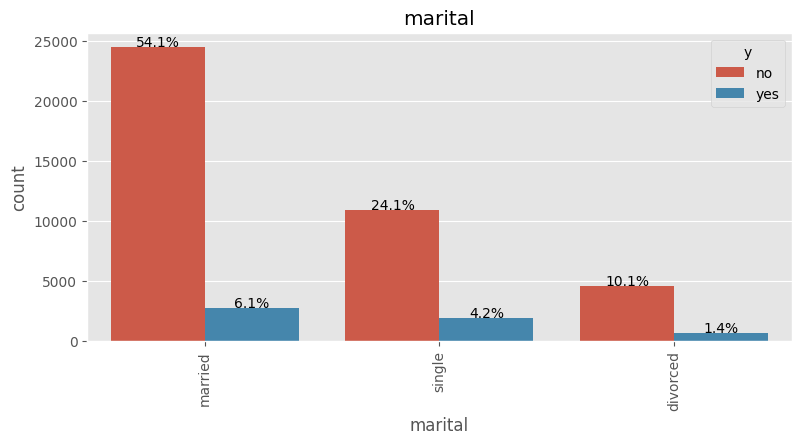

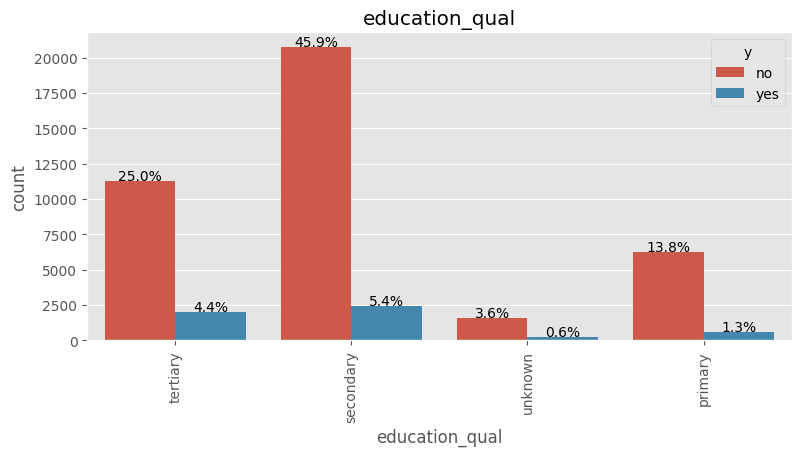

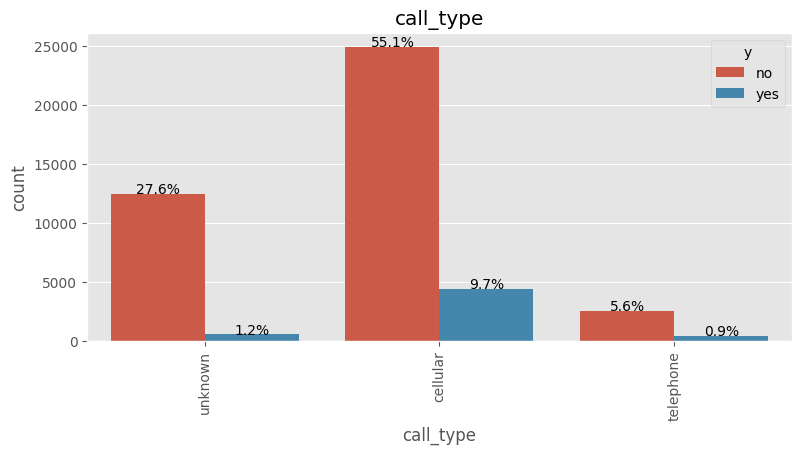

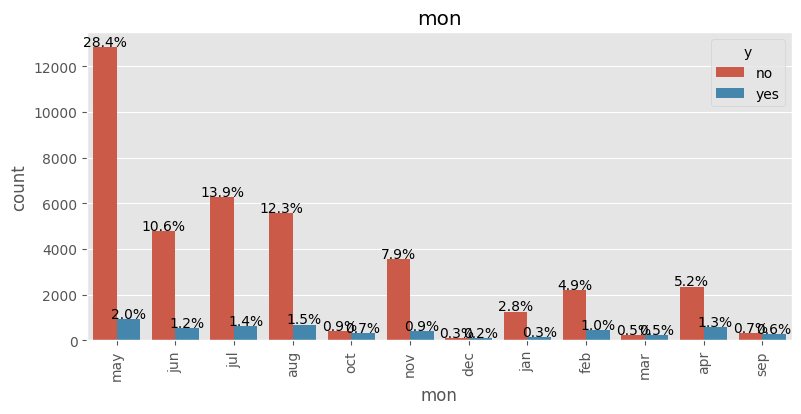

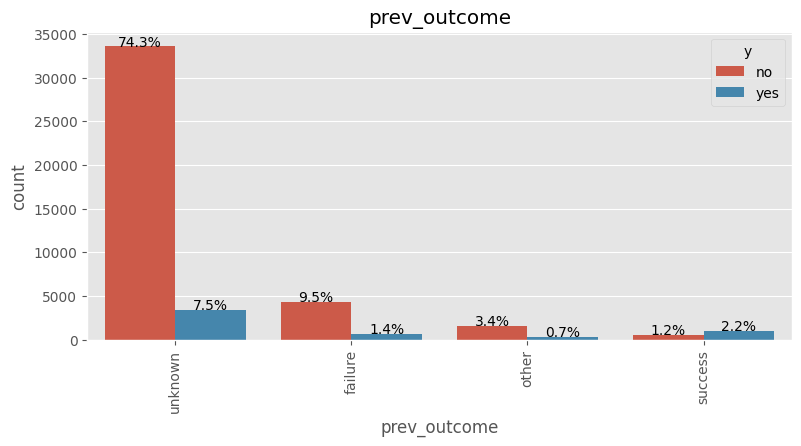

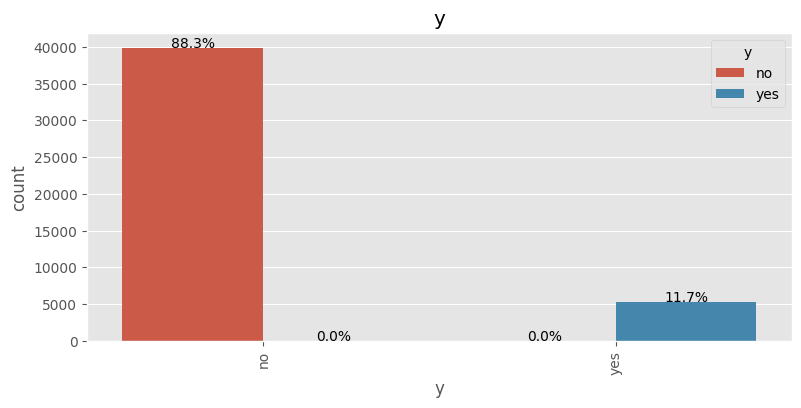

In [16]:
plt.style.use("ggplot")

for column in cat_var:
    plt.figure(figsize=(20,4))
    ax = plt.subplot(121)
    sns.countplot(x=column, hue="y", data=df)
    plt.title(column)    
    plt.xticks(rotation=90)
    
    # Add percentage labels to the top of each bar
    for p in ax.patches:
        height = p.get_height()
        total = sum([p.get_height() for p in ax.patches if p.get_x() == p.get_x()])
        ax.text(p.get_x()+p.get_width()/2., height+50, f"{height/total*100:.1f}%", ha="center")
        
    plt.show()

In [17]:
df.describe()

,age,day,dur,num_calls
count,45205.000000,45205.00000,45205.000000,45205.000000
mean,40.937087,15.80688,258.183055,2.763898
std,10.619130,8.32234,257.538504,3.098189
min,18.000000,1.00000,0.000000,1.000000
25%,33.000000,8.00000,103.000000,1.000000
50%,39.000000,16.00000,180.000000,2.000000
75%,48.000000,21.00000,319.000000,3.000000
max,95.000000,31.00000,4918.000000,63.000000


In [18]:
lower_boundries= []
upper_boundries= []
for i in ["age", "dur", "day","num_calls"]:
    IQR= df[i].quantile(0.75) - df[i].quantile(0.25)
    lower_bound= df[i].quantile(0.25) - (1.5*IQR)
    upper_bound= df[i].quantile(0.75) + (1.5*IQR)
    
    print(i, ":", lower_bound, ",",  upper_bound)
    
    lower_boundries.append(lower_bound)
    upper_boundries.append(upper_bound)
     

age : 10.5 , 70.5
dur : -221.0 , 643.0
day : -11.5 , 40.5
num_calls : -2.0 , 6.0


In [19]:
j = 0
for i in ["age", "dur", "day","num_calls"]:
    df.loc[df[i] > upper_boundries[j], i] = int(upper_boundries[j])
    j = j + 1  

In [20]:
df.describe()

,age,day,dur,num_calls
count,45205.000000,45205.00000,45205.00000,45205.000000
mean,40.863666,15.80688,234.95620,2.392235
std,10.380009,8.32234,176.75476,1.600152
min,18.000000,1.00000,0.00000,1.000000
25%,33.000000,8.00000,103.00000,1.000000
50%,39.000000,16.00000,180.00000,2.000000
75%,48.000000,21.00000,319.00000,3.000000
max,70.000000,31.00000,643.00000,6.000000


In [21]:
df

,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome,y
0,58,management,married,tertiary,unknown,5,may,261,1,unknown,no
1,44,technician,single,secondary,unknown,5,may,151,1,unknown,no
2,33,entrepreneur,married,secondary,unknown,5,may,76,1,unknown,no
3,47,blue-collar,married,unknown,unknown,5,may,92,1,unknown,no
4,33,unknown,single,unknown,unknown,5,may,198,1,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...
45200,51,technician,married,tertiary,cellular,17,nov,643,3,unknown,yes
45201,70,retired,divorced,primary,cellular,17,nov,456,2,unknown,yes
45202,70,retired,married,secondary,cellular,17,nov,643,5,success,yes
45203,57,blue-collar,married,secondary,telephone,17,nov,508,4,unknown,no


In [22]:
df.replace({'y' : { 'yes' : 1, 'no' : 0}},inplace=True)

In [23]:
df

,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome,y
0,58,management,married,tertiary,unknown,5,may,261,1,unknown,0
1,44,technician,single,secondary,unknown,5,may,151,1,unknown,0
2,33,entrepreneur,married,secondary,unknown,5,may,76,1,unknown,0
3,47,blue-collar,married,unknown,unknown,5,may,92,1,unknown,0
4,33,unknown,single,unknown,unknown,5,may,198,1,unknown,0
...,...,...,...,...,...,...,...,...,...,...,...
45200,51,technician,married,tertiary,cellular,17,nov,643,3,unknown,1
45201,70,retired,divorced,primary,cellular,17,nov,456,2,unknown,1
45202,70,retired,married,secondary,cellular,17,nov,643,5,success,1
45203,57,blue-collar,married,secondary,telephone,17,nov,508,4,unknown,0


In [32]:
encoded_df = pd.get_dummies(df, columns = ['job', 'marital','call_type','prev_outcome','mon','education_qual'])
encoded_df

,age,day,dur,num_calls,y,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,...,mon_jun,mon_mar,mon_may,mon_nov,mon_oct,mon_sep,education_qual_primary,education_qual_secondary,education_qual_tertiary,education_qual_unknown
0,58,5,261,1,0,0,0,0,0,1,...,0,0,1,0,0,0,0,0,1,0
1,44,5,151,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
2,33,5,76,1,0,0,0,1,0,0,...,0,0,1,0,0,0,0,1,0,0
3,47,5,92,1,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,1
4,33,5,198,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45200,51,17,643,3,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
45201,70,17,456,2,1,0,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0
45202,70,17,643,5,1,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
45203,57,17,508,4,0,0,1,0,0,0,...,0,0,0,1,0,0,0,1,0,0


In [36]:
p = encoded_df.drop(['y'],axis =1)
q= encoded_df['y']

In [37]:
smote_tomek = SMOTETomek(sampling_strategy=0.75)
X, y = smote_tomek.fit_resample(p, q)
print(y.value_counts())

0    39470
1    29491
Name: y, dtype: int64


In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [40]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [44]:
lr_model = LogisticRegression(max_iter=100)
lr_model.fit(X_train, y_train)
predicted=lr_model.predict(X_test)
conf = confusion_matrix(y_test, predicted)

print()
print()
print ("The accuracy of Logistic Regression is : ", accuracy_score(y_test, predicted)*100, "%")
print ("The aurroc_auc_score of Logistic Regression is : ", roc_auc_score(y_test, lr_model.predict_proba(X_test)[:, 1]))
log_reg_y_pred_prob = lr_model.predict_proba(X_test)[:, 1]
log_reg_auc = roc_auc_score(y_test, log_reg_y_pred_prob)




The accuracy of Logistic Regression is :  93.29905967132437 %
The aurroc_auc_score of Logistic Regression is :  0.9824124963638727


In [45]:
rf_model = RandomForestClassifier(n_estimators = 100, random_state = 0)  
rf_model.fit(X_train, y_train)  
predicted = rf_model.predict(X_test)
print("The accuracy of Random Forest is : ", accuracy_score(y_test, predicted.round())*100, "%")
print ("The aurroc_auc_score of  random forest is : ", roc_auc_score(y_test, rf_model.predict_proba(X_test)[:, 1]))
dt_y_pred_prob = rf_model.predict_proba(X_test)[:, 1]
dt_fpr, dt_tpr, _ = roc_curve(y_test, dt_y_pred_prob)
dt_auc = roc_auc_score(y_test, dt_y_pred_prob)

The accuracy of Random Forest is :  93.9274101414887 %
The aurroc_auc_score of  random forest is :  0.9872689905392329


In [41]:
xgb_model = xgb.XGBClassifier(use_label_encoder=False)
xgb_model.fit(X_train, y_train) 
predicted = xgb_model.predict(X_test)

print()
print ("The accuracy of X Gradient Boosting is : ", accuracy_score(y_test, predicted)*100, "%")
print ("The aurroc_auc_score of Gradient Boosting is : ", roc_auc_score(y_test, xgb_model.predict_proba(X_test)[:, 1]))
xgb_y_pred_prob = xgb_model.predict_proba(X_test)[:, 1]
xgb_auc = roc_auc_score(y_test, xgb_y_pred_prob)

C:\Users\Prajin\anaconda3\envs\tensorflow\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")



The accuracy of X Gradient Boosting is :  93.99332102996748 %
The aurroc_auc_score of Gradient Boosting is :  0.9881203460011798
